In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

from pathlib import Path
from regression_utils import *

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

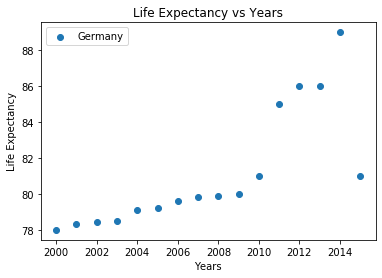

Train:Test split is:  4 : 12


In [4]:
df.fillna(df.mean(), inplace=True)

# change here 
country = 'Germany'

# extract dataframe for selected country
countryDataFrame = countryDF(country, df)

# Feature 1
countryQuantity = columnExtractor(countryDataFrame,'Life expectancy')

# Feature 2
years = columnExtractor(countryDataFrame,'Year')

# Visualization 
plotQuantities(years, countryQuantity, 'Years', 'Life Expectancy', country, 'Life Expectancy vs Years')

np.random.seed(5)
split = np.random.randint(1,15)
countryQuantityTrain, yearsTrain, countryQuantityTest, yearsTest = randomizer(countryQuantity, years, split)


length scale is:  14


/home/mihir/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


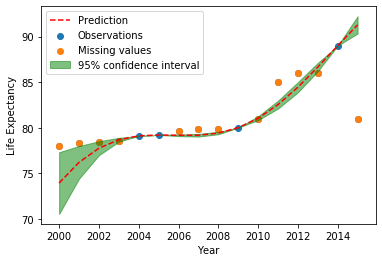

In [5]:
# Gaussian Regression 
countryQuantityPredict, sigma = gaussianRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity) 

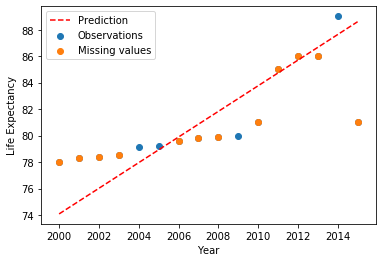

In [6]:
# Linear Regression 
countryQuantityPredictLR = linearRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity)

In [7]:
# error computation for GPR 
qty = 'Life expectancy'
groundTruth = columnExtractor(countryDataFrame,qty).tolist()[::-1]
print('groundTruth values \n',groundTruth)

countryQuantityPredict = [round(float(i),1) for i in list(countryQuantityPredict)]
errorGPR = np.sqrt(mean_squared_error(groundTruth, countryQuantityPredict))
print('GPR prediction \n',countryQuantityPredict)

print('------------------------------------------')


# error computation for LR 
countryQuantityPredictLR = [round(float(i),1) for i in list(countryQuantityPredictLR)]
print('LR prediction \n',list(countryQuantityPredictLR))
errorLR = np.sqrt(mean_squared_error(groundTruth, countryQuantityPredictLR))
print('')

print('GPR error: ',errorGPR)
print('LR error: ',errorLR)

#go with rmse for outliers 
#try using normalization

groundTruth values 
 [78.0, 78.3, 78.4, 78.5, 79.1, 79.2, 79.6, 79.8, 79.9, 80.0, 81.0, 85.0, 86.0, 86.0, 89.0, 81.0]
GPR prediction 
 [73.9, 76.2, 77.7, 78.7, 79.1, 79.2, 79.2, 79.2, 79.4, 80.0, 81.0, 82.5, 84.4, 86.7, 89.0, 91.3]
------------------------------------------
LR prediction 
 [74.1, 75.1, 76.0, 77.0, 78.0, 78.9, 79.9, 80.9, 81.8, 82.8, 83.8, 84.7, 85.7, 86.7, 87.6, 88.6]

GPR error:  2.935877211328837
LR error:  2.689563161556166
